In [13]:
import pandas as pd
import pickle
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [6]:
# df = pd.read_csv('C:/Saravana/Data/Raw/2016.log')
df = pd.read_pickle('C:/Saravana/Data/Raw/export-cleansed-4851f054c66579780503d70880731802.pkl.bz2')
display(df.head())

,IMP_ID,GJ,IMPORT,MUFO_REFERENZ_N,BARCODE_NR,VERANST_SEGMENT,REKLA_JN,VG_DATUM_VON,VG_ORT,VG_RAUM,NUTZFALL,NUTZFALL_RAUM,MUSIKLEITER_NAME,KAPELLE_NAME,TARIF_NR,TARIF_BEZ,NUTZFALL_NR,VG_INKASSO,INKASSO_NETTO,INKASSO_BRUTTO,VERANST_GESCHAEFTSZEICHEN,VERANST_NAME,VERANST_STRASSE,VERANST_PLZ,VERANST_ORT,NUTZLIZNEHM_GESCHAEFTSZEICHEN,NUTZLIZNEHM_NAME,NUTZLIZNEHM_VORNAME,NUTZLIZNEHM_STRASSE,NUTZLIZNEHM_PLZ,NUTZLIZNEHM_ORT,LOCATION,BAND,PROMOTER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938765,24643,2016,ABRE U INKA 2016,NaN,5027961220,4.0,NONRekla,2014-02-09,LISBERG,TURNHALLE SV RW LISBERG,20140209.0,TURNHALLE SV RW LISBERG,NaN,NaN,892,U-K (MUSIKER),18293163,140.0,NaN,NaN,1035530900,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V,SCHINDHOLZWEG 17,96194,WALSDORF,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,LISBERG TURNHALLE SV RW LISBERG,NaN,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194
9938766,24643,2016,ABRE U INKA 2016,NaN,5027961235,6.0,NONRekla,2014-02-08,LISBERG,TURNHALLE SV RW LISBERG,20140208.0,TURNHALLE SV RW LISBERG,STAERK REINHOLD,DAS BOEHMISCHE FEUER,892,U-K (MUSIKER),18293091,210.0,NaN,NaN,1035530900,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V,SCHINDHOLZWEG 17,96194,WALSDORF,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,LISBERG TURNHALLE SV RW LISBERG,DAS BOEHMISCHE FEUER,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194
9938851,24643,2016,ABRE U INKA 2016,NaN,5044481411,3.0,NONRekla,2014-03-15,MUENCHEN,WERNER-VON-SIEMENS-SCHULZENTRUM,20140315.0,WERNER-VON-SIEMENS-SCHULZENTRUM,NaN,NaN,974,U-K (MUSIKER) MINDESTVERGUETUNG,18483465,72.5,NaN,NaN,2000179545,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V,HOCHAECKERSTR. 123,81737,MUENCHEN,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,MUENCHEN WERNER-VON-SIEMENS-SCHULZENTRUM,NaN,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V...
9938852,24643,2016,ABRE U INKA 2016,NaN,5044481427,2.0,NONRekla,2014-03-14,MUENCHEN,PFARRHEIM UND KIRCHE,20140314.0,PFARRHEIM UND KIRCHE,NaN,NaN,974,U-K (MUSIKER) MINDESTVERGUETUNG,18483423,34.8,NaN,NaN,2000179545,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V,HOCHAECKERSTR. 123,81737,MUENCHEN,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,MUENCHEN PFARRHEIM UND KIRCHE,NaN,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V...
9938853,24643,2016,ABRE U INKA 2016,NaN,5044481469,2.0,NONRekla,2014-02-09,GRAFENRHEINFELD,KULTURHALLE GRAFENRHEINFELD,20140209.0,KULTURHALLE GRAFENRHEINFELD,NaN,NaN,892,U-K (MUSIKER),18184927,34.8,NaN,NaN,1023588500,MUSIKVEREIN WERNECK E.V,VON-FECHENBACH-STR. 27,97440,WERNECK,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,GRAFENRHEINFELD KULTURHALLE GRAFENRHEINFELD,NaN,MUSIKVEREIN WERNECK E.V 97440


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.VERANST_SEGMENT.unique()

array([ 4.,  6.,  3.,  2.,  5.,  7.,  8., 10.,  9., 11., 12.])

In [4]:
df.VG_RAUM.unique()

['TURNHALLE SV RW LISBERG', 'WERNER-VON-SIEMENS-SCHULZENTRUM', 'PFARRHEIM UND KIRCHE', 'KULTURHALLE GRAFENRHEINFELD', 'VEREINSHEIM TSV FRIESENRIED', ..., 'LEERSTAND 28.09.20', 'QUARTIERZENTRUM B26', 'GOETHE-INSTITUTE AUSLAND', 'COCKTAILBAR SUESS WAR GESTERN', 'TRAUMPALAST BIBERACH']
Length: 129572
Categories (129571, object): ['" DE SMUGGLER " CELTIC PUB', '" DORNSPACHHAUS " HISTOR. WIRTSHAUS', '" DORNSPACHHAUS " HISTORISCHES WIRTSHAUS', '" FIZZ " FESTE FEIERN', ..., 'ZWOENITZ', 'ZWOGGEL', 'ZWOTA', 'ZYCKO']

In [9]:
len(df.index)

3296137

In [17]:
# Filter segment 2(0-50 euros) & segment 3(50-100 euros) 

lowerclaim_df = df.query('VERANST_SEGMENT <= 3')
len(lowerclaim_df.index)

2029523

In [34]:
display(lowerclaim_df.columns)
# Count NaN values for each column in the dataframe
display(lowerclaim_df.isna().sum())

Index(['IMP_ID', 'GJ', 'IMPORT', 'MUFO_REFERENZ_N', 'BARCODE_NR',
       'VERANST_SEGMENT', 'REKLA_JN', 'VG_DATUM_VON', 'VG_ORT', 'VG_RAUM',
       'NUTZFALL', 'NUTZFALL_RAUM', 'MUSIKLEITER_NAME', 'KAPELLE_NAME',
       'TARIF_NR', 'TARIF_BEZ', 'NUTZFALL_NR', 'VG_INKASSO', 'INKASSO_NETTO',
       'INKASSO_BRUTTO', 'VERANST_GESCHAEFTSZEICHEN', 'VERANST_NAME',
       'VERANST_STRASSE', 'VERANST_PLZ', 'VERANST_ORT',
       'NUTZLIZNEHM_GESCHAEFTSZEICHEN', 'NUTZLIZNEHM_NAME',
       'NUTZLIZNEHM_VORNAME', 'NUTZLIZNEHM_STRASSE', 'NUTZLIZNEHM_PLZ',
       'NUTZLIZNEHM_ORT', 'LOCATION', 'BAND', 'PROMOTER'],
      dtype='object')

IMP_ID                                 0
GJ                                     0
IMPORT                                 0
MUFO_REFERENZ_N                  1979319
BARCODE_NR                             0
VERANST_SEGMENT                        0
REKLA_JN                               0
VG_DATUM_VON                           0
VG_ORT                               146
VG_RAUM                               95
NUTZFALL                               0
NUTZFALL_RAUM                         95
MUSIKLEITER_NAME                 1306586
KAPELLE_NAME                      960942
TARIF_NR                               0
TARIF_BEZ                              0
NUTZFALL_NR                            0
VG_INKASSO                             0
INKASSO_NETTO                    2029521
INKASSO_BRUTTO                   2029521
VERANST_GESCHAEFTSZEICHEN              0
VERANST_NAME                         103
VERANST_STRASSE                    11578
VERANST_PLZ                          657
VERANST_ORT     

In [ ]:
IMP_ID                                 
GJ                               GeschäftsJahr      
IMPORT                           Distribution where the data came from      
MUFO_REFERENZ_N                  
BARCODE_NR                             
VERANST_SEGMENT                  Event segment
REKLA_JN                         Reclamation 
VG_DATUM_VON                     Event Date
VG_ORT                           Event place
VG_RAUM                          Event room

NUTZFALL                         Usage of event or 
NUTZFALL_RAUM                    Use case Room or Music hall where the music is used

MUSIKLEITER_NAME                 Music Leader name
KAPELLE_NAME                     Chapel name

TARIF_NR                         Tariff Number
TARIF_BEZ                        Tariff Bez
NUTZFALL_NR                      Usecase Number

VG_INKASSO                       Event collection
INKASSO_NETTO                    Net-Collection
INKASSO_BRUTTO                   Gross-Collection
VERANST_GESCHAEFTSZEICHEN        Event business sign or mark 
VERANST_NAME                     Event name
VERANST_STRASSE                  Event street
VERANST_PLZ                      Event post code
VERANST_ORT                      Event place

# Nutzungs Lizenznehmer - someone who has got the license(Usage licence) for the music works
NUTZLIZNEHM_GESCHAEFTSZEICHEN    
NUTZLIZNEHM_NAME                 name of person who aquired usage license
NUTZLIZNEHM_VORNAME              surname of person who aquired usage license
NUTZLIZNEHM_STRASSE              street of person who aquired usage license
NUTZLIZNEHM_PLZ                  postcode of person who aquired usage license
NUTZLIZNEHM_ORT                  place of person who aquired usage license

LOCATION                         location - VG_ORT + VG_RAUM
BAND                             band - KAPELLE_NAME and empty rows of kapelle name is filled with MUSIKLEITER_NAME
PROMOTER                         promoter - VERANST_NAME + VERANST_PLZ

VG_RAUM = 'IM FREIEN'(In Outside) or Name of the City


In [50]:
print(lowerclaim_df['VG_INKASSO'].max())
print(lowerclaim_df['VG_INKASSO'].min())

409.7
0.04


Univariate Plotting - Distribution of the event collection in Euros

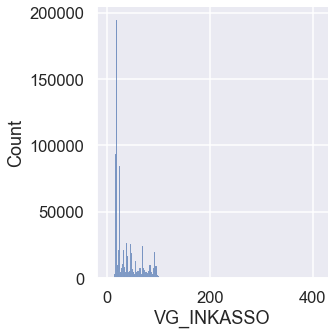

In [82]:
# kde - Kernel Density
sns.displot(lowerclaim_df['VG_INKASSO'], kde=False)
plt.show()

VG_ORT

In [12]:
# Find the values seperated by comma
contains_comma = lowerclaim_df[lowerclaim_df['VG_ORT'].str.contains(',') == True]
non_comma_df = lowerclaim_df[lowerclaim_df['VG_ORT'].str.contains(',') == False]
print(len(contains_comma))
print(len(contains_comma['VG_ORT'].unique()))
print(contains_comma['VG_ORT'])
splitted_with_comma = contains_comma['VG_ORT'].str.split(r",", expand=True)
print(len(splitted_with_comma[0].unique()))
print(splitted_with_comma[0])


12509
244
ID
9940000                             MUENSTER, WESTF
9940329                              KERPEN, RHEINL
9944916                       SALZWEDEL, HANSESTADT
9944920                                 DESSAU, ANH
9947304                             STEINACH, THUER
9947646                              MEISSEN, SACHS
9947869                      GREIFSWALD, HANSESTADT
9947870                      GREIFSWALD, HANSESTADT
9947912                                 DESSAU, ANH
9948755                             HATTINGEN, RUHR
9949648                      GREIFSWALD, HANSESTADT
9950616                                  HOF, SAALE
9951615                              DUEREN, RHEINL
9952284                            ALTENBURG, THUER
9952340                                DOHNA, SACHS
9952343                            SONNEBERG, THUER
9953646                                 ESSEN, RUHR
9953675                             ARNSBERG, WESTF
9953706                            BARCHFELD, WERRA

In [17]:
print("--------Non-commma-values--------")
print('No. of non-comma values : {}'.format(len(non_comma_df)))
print('Non-comma unique values : {}'.format(len(non_comma_df['VG_ORT'].unique())))
non_splitted_places = non_comma_df['VG_ORT']
place_df = pd.concat([non_splitted_places,splitted_with_comma[0]])
print('The number of unique places: {}'.format(len(place_df.unique())))
# display('NaN values in df_raw : {}, NaN values in df: {}'.format(df_raw['VG_INKASSO'].isna().sum(), df['VG_INKASSO'].isna().sum()))

--------Non-commma-values--------
No. of non-comma values : 2016868
Non-comma unique values : 11355
The number of unique places: 11421


VG_RAUM

In [21]:
# Find all the categories of VG_RAUM
lowerclaim_df['VG_RAUM_clean']=lowerclaim_df['VG_RAUM'].astype(str).fillna('').map(lambda x: re.sub(r'\W+', ' ', x))
lowerclaim_df['VG_RAUM_tokenized']=lowerclaim_df['VG_RAUM_clean'].apply(word_tokenize, language='german')

flat_list = [item for sublist in lowerclaim_df['VG_RAUM_tokenized'].tolist() for item in sublist]

german_stop_words = stopwords.words('german')

text_wo_stop_words = [word for word in flat_list if word.lower() not in german_stop_words]

stopwords = [
    'ST', 'FREIEN', 'BAD', 'HAUS', 'EV', 'BERLIN', 'KATH', 'S', 'HOF', 'ALTE', 'MITTE', 'LUTH', 'MUENCHEN',
    'IRISH', 'MUSIK', 'KULTUR', 'FUER', 'EVANG', 'MARITIM', 'KOELN', 'U', 'TURN', 'E', 'STUTTGART', 'ALTES',
    'A', 'GASTES', 'THE', 'EUROPA', 'HANNOVER', 'STADT', 'BADEN', 'NUERNBERG', 'HAMBURG', 'NEUE',
    'EVANGELISCHE', 'LEIPZIG', 'B', 'DRESDEN', 'BREMEN', 'PETER', '1','ALTER'
]

text_wo_stop_words_2 = [word for word in text_wo_stop_words if word not in stopwords]

text_wo_stop_words_3 = ['KIRCHE' if 'KIRCHE' in word else word for word in text_wo_stop_words_2 ]

# display(text_wo_stop_words_3)

C:\Users\sgopalakrish\AppData\Local\Temp\ipykernel_9212\2008647935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowerclaim_df['VG_RAUM_clean']=lowerclaim_df['VG_RAUM'].astype(str).fillna('').map(lambda x: re.sub(r'\W+', ' ', x))


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/german.pickle[0m

  Searched in:
    - 'C:\\Users\\sgopalakrish/nltk_data'
    - 'c:\\Saravana\\Projects\\Intellizenz\\intellizenz-model-training\\.venv\\nltk_data'
    - 'c:\\Saravana\\Projects\\Intellizenz\\intellizenz-model-training\\.venv\\share\\nltk_data'
    - 'c:\\Saravana\\Projects\\Intellizenz\\intellizenz-model-training\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\sgopalakrish\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [20]:
fdist_kapelle = FreqDist(text_wo_stop_words_3)
print(fdist_kapelle)
#display(fdist_kapelle.most_common(60))

fdist_kapelle.plot(30,cumulative=False)

plt.show()

NameError: name 'text_wo_stop_words_3' is not defined

In [ ]:
# Group the places by the state
# Find the missing places using the PLZ or using the VG_Raum

In [69]:
# There are only 2 values in the INKASSO_NETTO and INKASSO_BRUTTO
# There are no null values in VG_INKASSO
# Lowest value of VG_INKASSO is 0.04 and highest value is 409.7
# How could segment 2 (0 - 50 euros) and segment 3 (50-100 euros) would have high VG_INKASSO values?


2029523

In [9]:
morethan100 = lowerclaim_df[lowerclaim_df['VG_INKASSO']>100]
len(morethan100)

22

Multivariate Analysis

(array([    0,     1,     2, ..., 12086, 12087, 12088]),
 [Text(0, 0, '191211800 - GOSPELCHOR SWEET CHARIOT'),
  Text(1, 0, 'AACH'),
  Text(2, 0, 'AACHEN'),
  Text(3, 0, 'AALEN'),
  Text(4, 0, 'AALEN, WUERTT'),
  Text(5, 0, 'AALEN-WALDHAUSEN'),
  Text(6, 0, 'AARBERGEN'),
  Text(7, 0, 'ABBENRODE'),
  Text(8, 0, 'ABENBERG'),
  Text(9, 0, 'ABENSBERG'),
  Text(10, 0, 'ABENTHEUER'),
  Text(11, 0, 'ABSBERG'),
  Text(12, 0, 'ABSTATT'),
  Text(13, 0, 'ABTGSMUEND-HOEHENSTADT'),
  Text(14, 0, 'ABTLOEBNITZ'),
  Text(15, 0, 'ABTSDORF B LUTHERSTADT'),
  Text(16, 0, 'ABTSGMUEND'),
  Text(17, 0, 'ABTSTEINACH'),
  Text(18, 0, 'ABTSWIND'),
  Text(19, 0, 'ACHBERG'),
  Text(20, 0, 'ACHERN'),
  Text(21, 0, 'ACHIM'),
  Text(22, 0, 'ACHSLACH'),
  Text(23, 0, 'ACHSTETTEN'),
  Text(24, 0, 'ACHTELSBACH'),
  Text(25, 0, 'ACHTRUP'),
  Text(26, 0, 'ADAMSDORF'),
  Text(27, 0, 'ADELBERG'),
  Text(28, 0, 'ADELEBSEN'),
  Text(29, 0, 'ADELHEIDSDORF'),
  Text(30, 0, 'ADELMANNSFELDEN'),
  Text(31, 0, 'ADELSCHLAG'),
  Te

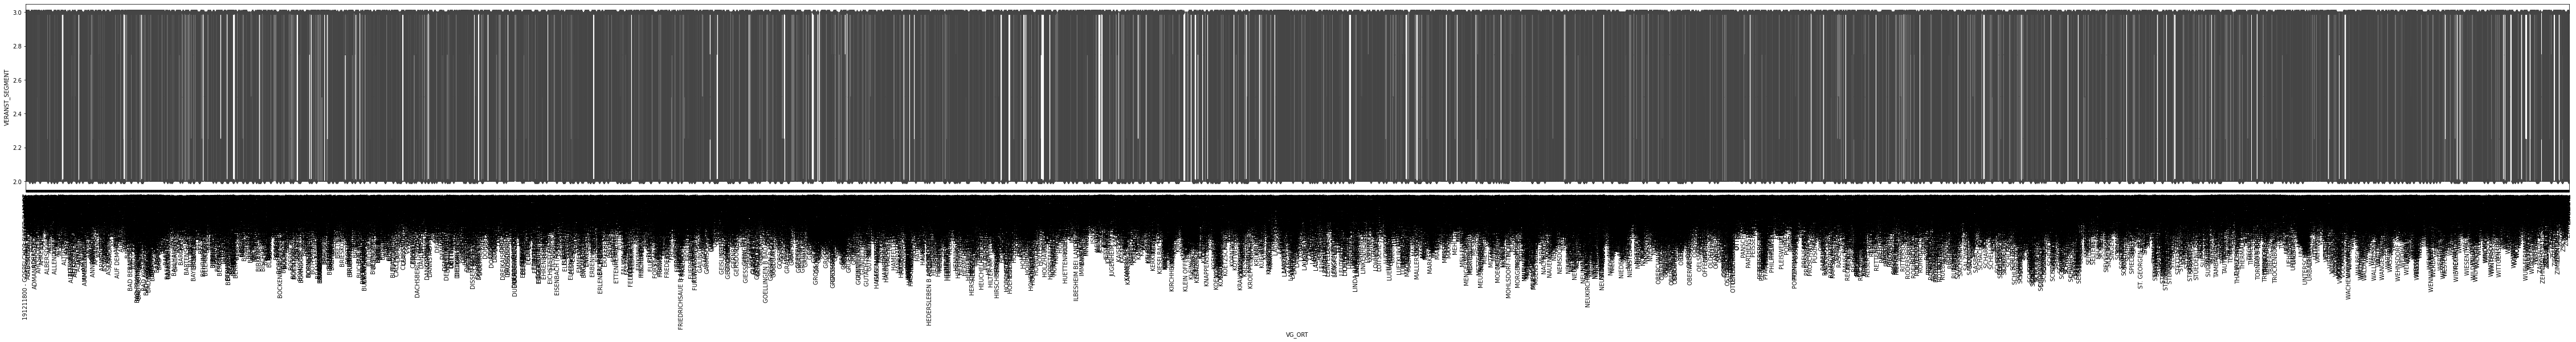

In [19]:
# Null values
# VG_ORT - 146
# VERANST_ORT  368
# VG_RAUM/LOCATION - 95
# VERANST_NAME/PROMOTER  103
# TARIF_BEZ  0
# BAND  943181
# KAPELLE_NAME 960942
# sns.barplot(x=lowerclaim_df['VG_ORT'], y=df['VERANST_SEGMENT'])
# plt.show()

#box plot Place/Customer Segment
data = pd.concat([lowerclaim_df['VG_ORT'], df['VERANST_SEGMENT']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x="VG_ORT", y="VERANST_SEGMENT", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, 'BM I. 1. / 2.'),
  Text(1, 0, 'BM I.1. BIS 25 MINUTEN'),
  Text(2, 0, 'CHORVERBAND KONZERT E-MUSIK MIT EINTRITTSGELD'),
  Text(3, 0, 'CHORVERBAND KONZERT E-MUSIK OHNE EINTRITTSGELD'),
  Text(4, 0, 'CHORVERBAND KONZERT U-MUSIK'),
  Text(5, 0, 'E (MUSIKER)'),
  Text(6, 0, 'E (TONTRAEGER)'),
  Text(7, 0, 'E HAERTEFALL MINDESTVERGUETUNG'),
  Text(8, 0, 'E HAERTEFALL REGELVERGUETUNG'),
  Text(9, 0, 'E HAERTEFALL REGELVERGUETUNG (5%)'),
  Text(10, 0, 'E HAERTEFALL REGELVERGUETUNG (7,5%)'),
  Text(11, 0, 'E-P'),
  Text(12, 0, 'KONZERT CHORVERBAENDE MIT EINTRITTSGELD (10%)'

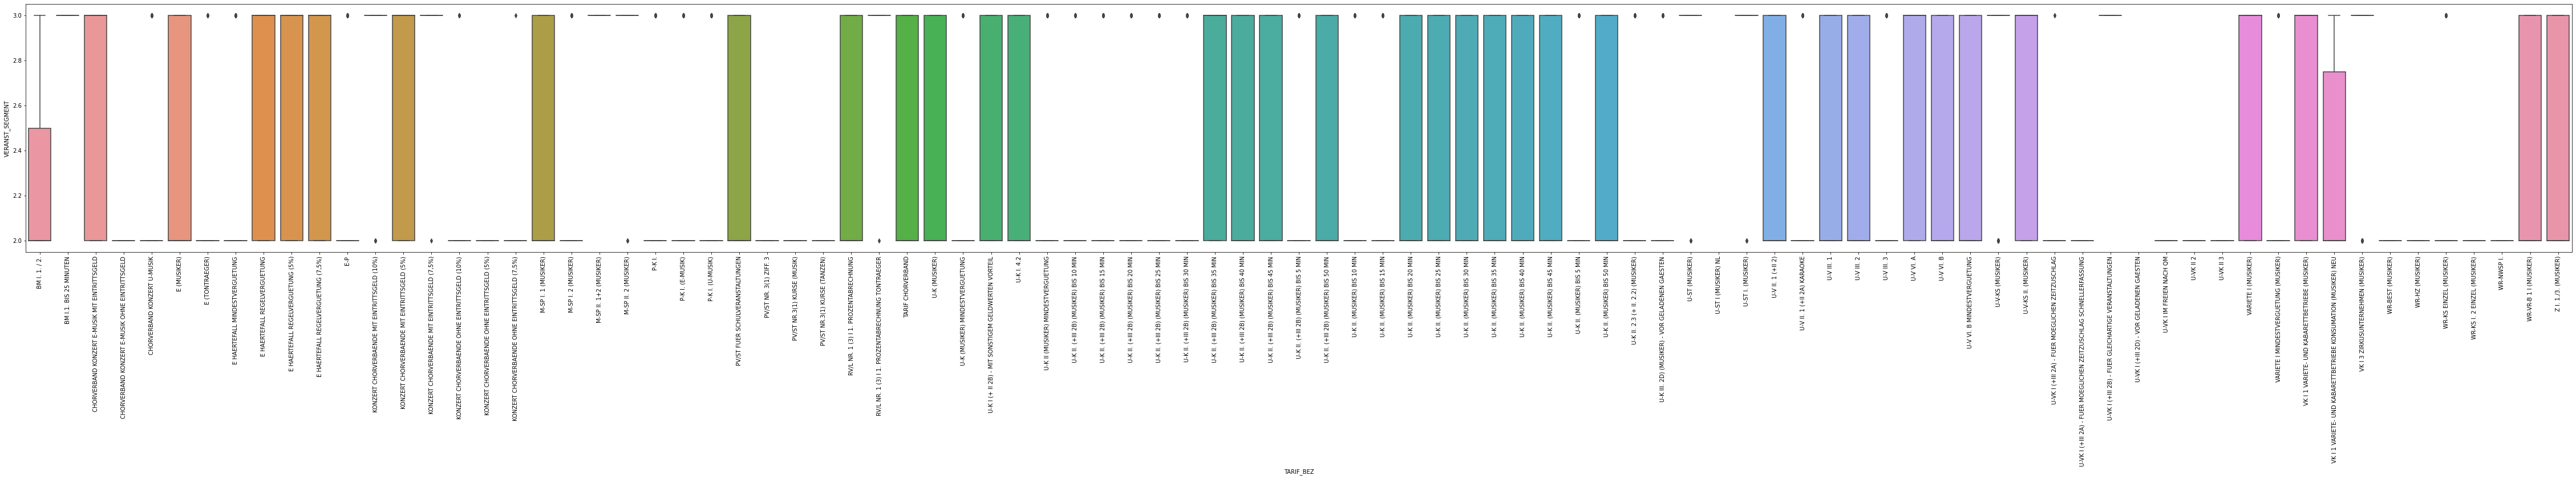

In [11]:
# sns.barplot(x=lowerclaim_df['TARIF_BEZ'], y=df['VERANST_SEGMENT'])
# plt.show()
#box plot Tarif/Customer Segment
data = pd.concat([lowerclaim_df['TARIF_BEZ'], df['VERANST_SEGMENT']], axis=1)
f, ax = plt.subplots(figsize=(80, 8))
fig = sns.boxplot(x="TARIF_BEZ", y="VERANST_SEGMENT", data=data)
# fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
# 54 Tarifs used frequently

In [22]:
# Find the relationship between tarif, customer segment and the band that performed
sns.boxplot(x="TARIF_BEZ", y="VERANST_SEGMENT", hue="BAND", data=lowerclaim_df);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002090A438430> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Find the relationship between tarif, customer segment and the location the event was performed
sns.boxplot(x="TARIF_BEZ", y="VERANST_SEGMENT", hue="LOCATION", data=lowerclaim_df);

Relationship with features

Correlation

In [14]:
# Find correlation of customer segments and other variables
lowerclaim_df.corr()['VERANST_SEGMENT'].sort_values(ascending=False)

VERANST_SEGMENT                  1.000000
VG_INKASSO                       0.875554
TARIF_NR                         0.159714
IMP_ID                           0.016941
GJ                               0.013378
NUTZLIZNEHM_GESCHAEFTSZEICHEN    0.000163
NUTZFALL                        -0.008144
NUTZFALL_NR                     -0.008580
BARCODE_NR                      -0.025598
VERANST_GESCHAEFTSZEICHEN       -0.035554
INKASSO_NETTO                         NaN
INKASSO_BRUTTO                        NaN
Name: VERANST_SEGMENT, dtype: float64

In [15]:
# Find correlation of VG_INKASSO and other variables
lowerclaim_df.corr()['VG_INKASSO'].sort_values(ascending=False)

VG_INKASSO                       1.000000
VERANST_SEGMENT                  0.875554
TARIF_NR                         0.212431
IMP_ID                           0.016038
GJ                               0.011671
NUTZLIZNEHM_GESCHAEFTSZEICHEN    0.000364
VERANST_GESCHAEFTSZEICHEN       -0.008584
NUTZFALL                        -0.012449
NUTZFALL_NR                     -0.016409
BARCODE_NR                      -0.029079
INKASSO_NETTO                         NaN
INKASSO_BRUTTO                        NaN
Name: VG_INKASSO, dtype: float64

In [20]:
lowerclaim_df.corr()

,IMP_ID,GJ,BARCODE_NR,VERANST_SEGMENT,NUTZFALL,TARIF_NR,NUTZFALL_NR,VG_INKASSO,INKASSO_NETTO,INKASSO_BRUTTO,VERANST_GESCHAEFTSZEICHEN,NUTZLIZNEHM_GESCHAEFTSZEICHEN
IMP_ID,1.000000,0.964368,0.536276,0.016941,0.657783,0.122436,0.636492,0.016038,1.0,1.0,0.105915,-0.054460
GJ,0.964368,1.000000,0.555722,0.013378,0.681507,0.121176,0.632508,0.011671,1.0,1.0,0.108989,-0.056110
BARCODE_NR,0.536276,0.555722,1.000000,-0.025598,0.771853,0.123917,0.670264,-0.029079,NaN,NaN,0.134637,-0.043295
VERANST_SEGMENT,0.016941,0.013378,-0.025598,1.000000,-0.008144,0.159714,-0.008580,0.875554,NaN,NaN,-0.035554,0.000163
NUTZFALL,0.657783,0.681507,0.771853,-0.008144,1.000000,0.157929,0.794169,-0.012449,NaN,NaN,0.127927,-0.053422
TARIF_NR,0.122436,0.121176,0.123917,0.159714,0.157929,1.000000,0.090901,0.212431,NaN,NaN,0.036866,0.002456
NUTZFALL_NR,0.636492,0.632508,0.670264,-0.008580,0.794169,0.090901,1.000000,-0.016409,NaN,NaN,0.130120,-0.062058
VG_INKASSO,0.016038,0.011671,-0.029079,0.875554,-0.012449,0.212431,-0.016409,1.000000,NaN,NaN,-0.008584,0.000364
INKASSO_NETTO,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
INKASSO_BRUTTO,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


<AxesSubplot:>

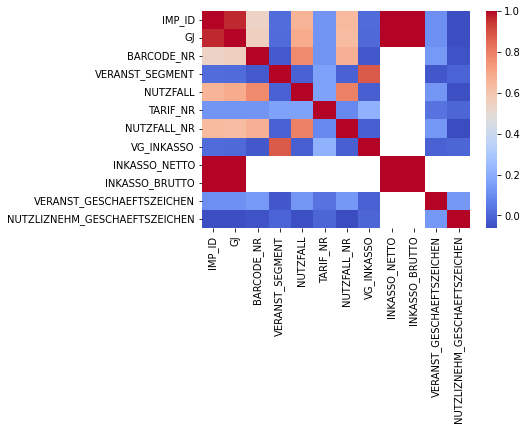

In [21]:
sns.heatmap(lowerclaim_df.corr(), cmap='coolwarm')

Outliers